<span style="font-family:Papyrus; font-size:3em;">Lab: Model Debugging - Static Analysis</span>


This lab explores approaches to debugging models using a static analysis.

# Preliminaries

In [86]:
IS_COLAB = False
#
if IS_COLAB:
    !pip install matplotlib
    !pip install numpy
    !pip install tellurium
    !pip install SBMLLint
#    
# Constants for standalone notebook
if not IS_COLAB:
    CODE_DIR = "/home/ubuntu/advancing-biomedical-models/common"
    MODEL_DIR = "/home/ubuntu/advancing-biomedical-models/labs/models"
    LAB_DIR = "/home/ubuntu/advancing-biomedical-models/labs"
else:
    from google.colab import drive
    drive.mount('/content/drive')
    CODE_DIR = "/content/drive/MyDrive/Winter 2021/common"
    MODEL_DIR = "/content/drive/MyDrive/Winter 2021/labs/models"
    LAB_DIR = "/content/drive/MyDrive/Winter 2021/labs"
import sys
sys.path.insert(0, CODE_DIR)

In [70]:
# Make the packages usable in this notebook
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tellurium as te
from SBMLLint.tools.sbmllint import lint

In [53]:
# Column names
C_XML_FILE = "xml_file"
C_NUM_REACTION = "num_reaction"
C_NUM_SPECIES = "num_species"
# Constants
XML_FILES = [m for m in os.listdir(MODEL_DIR) if m[-3:] == "xml"]

In [84]:
XML_FILES

['BIOMD0000000819.xml',
 'BIOMD0000000810.xml',
 'BIOMD0000000413.xml',
 'BIOMD0000000895.xml',
 'BIOMD0000000489.xml',
 'BIOMD0000000439.xml',
 'BIOMD0000000847.xml',
 'BIOMD0000000479.xml',
 'BIOMD0000000943.xml',
 'BIOMD0000000927.xml',
 'BIOMD0000000786.xml',
 'BIOMD0000000052.xml',
 'BIOMD0000000697.xml',
 'BIOMD0000000851.xml',
 'BIOMD0000000896.xml',
 'BIOMD0000000453.xml',
 'BIOMD0000000928.xml',
 'BIOMD0000000579.xml',
 'BIOMD0000000517.xml',
 'BIOMD0000000165.xml',
 'BIOMD0000000990.xml',
 'BIOMD0000000405.xml',
 'BIOMD0000000934.xml',
 'BIOMD0000000985.xml',
 'BIOMD0000000627.xml',
 'BIOMD0000000519.xml',
 'BIOMD0000000452.xml']

# Helper Functions

In [78]:
def getModel(xmlFile):
    """
    Parameters
    ----------
    xmlFile: str/int
        name of SBML xml file in models directory
    
    Returns
    -------
    str: Antimony Model
    ExtendedRoadrunner: roadrunner model
    """
    if isinstance(xmlFile, int):
        xmlFile = "BIOMD0000000%d.xml" % xmlFile
    path = os.path.join(MODEL_DIR, xmlFile)
    rr = te.loadSBMLModel(path)
    modelStr = rr.getAntimony()
    return modelStr, rr

# Tests
modelStr, rr = getModel(XML_FILES[0])
assert(isinstance(modelStr, str))
assert(isinstance(rr, te.roadrunner.extended_roadrunner.ExtendedRoadRunner ))
newModelStr, _ = getModel(819)
assert(modelStr == newModelStr)

In [67]:
def reportStatistics(xmlFiles):
    """
    Reports various model statistics.
    """
    dct = {C_XML_FILE: [], C_NUM_REACTION: [], C_NUM_SPECIES: []}
    for xmlFile in xmlFiles:
        _, rr = getModel(xmlFile)
        dct[C_XML_FILE].append(xmlFile)
        dct[C_NUM_REACTION].append(rr.getNumReactions())
        dct[C_NUM_SPECIES].append(rr.getNumFloatingSpecies())
    df = pd.DataFrame(dct)
    df = df.sort_values(C_NUM_REACTION)
    df = df.set_index(C_XML_FILE)
    return df

# Tests
size = 5
df = reportStatistics(XML_FILES[0:size])
assert(len(df) == size)

In [81]:
def checkMassBalance(xmlFile):
    try:
        modelStr, _ = getModel(xmlFile)
        _ = lint(modelStr, mass_balance_check="games")
    except Exception as err:
        print("***Error in file %s" % xmlFile)
# Tests
checkMassBalance(XML_FILES[0])

Model analyzed...
At least one error found.


IL_6R_on_S = IL_6__Cell_bound_IL_6R_complex_on_S by reaction(s):
1. Recycling_of_Receptors_S: IL_6__Cell_bound_IL_6R_complex_on_S -> IL_6R_on_S

However, IL_6R_on_S < IL_6__Cell_bound_IL_6R_complex_on_S by reaction(s):
2. IL6_dissociation_from_stem_cells: IL_6__Cell_bound_IL_6R_complex_on_S -> IL_6__L + IL_6R_on_S


----------------------------------------------------------------------


IL_6R_on_E = IL_6__Cell_bound_IL_6R_complex_on_E by reaction(s):
1. Recycling_of_Receptors_E: IL_6__Cell_bound_IL_6R_complex_on_E -> IL_6R_on_E

However, IL_6R_on_E < IL_6__Cell_bound_IL_6R_complex_on_E by reaction(s):
2. IL6_dissociation_from_progenitor_cells: IL_6__Cell_bound_IL_6R_complex_on_E -> IL_6__L + IL_6R_on_E


----------------------------------------------------------------------


IL_6R_on_D = IL_6__Cell_bound_IL_6R_complex_on_D by reaction(s):
1. Recycling_of_Receptors_D: IL_6__Cell_bound_IL_6R_complex_on_D -> IL_6R_on_D

However, IL_6R_on_D <

# Mass Balance Errors

In [82]:
for xmlFile in MODELS:
    checkMassBalance(xmlFile)

Model analyzed...
At least one error found.


IL_6R_on_S = IL_6__Cell_bound_IL_6R_complex_on_S by reaction(s):
1. Recycling_of_Receptors_S: IL_6__Cell_bound_IL_6R_complex_on_S -> IL_6R_on_S

However, IL_6R_on_S < IL_6__Cell_bound_IL_6R_complex_on_S by reaction(s):
2. IL6_dissociation_from_stem_cells: IL_6__Cell_bound_IL_6R_complex_on_S -> IL_6__L + IL_6R_on_S


----------------------------------------------------------------------


IL_6R_on_E = IL_6__Cell_bound_IL_6R_complex_on_E by reaction(s):
1. Recycling_of_Receptors_E: IL_6__Cell_bound_IL_6R_complex_on_E -> IL_6R_on_E

However, IL_6R_on_E < IL_6__Cell_bound_IL_6R_complex_on_E by reaction(s):
2. IL6_dissociation_from_progenitor_cells: IL_6__Cell_bound_IL_6R_complex_on_E -> IL_6__L + IL_6R_on_E


----------------------------------------------------------------------


IL_6R_on_D = IL_6__Cell_bound_IL_6R_complex_on_D by reaction(s):
1. Recycling_of_Receptors_D: IL_6__Cell_bound_IL_6R_complex_on_D -> IL_6R_on_D

However, IL_6R_on_D <

# Model statistics

In [37]:
XML_FILES

['BIOMD0000000819.xml',
 'BIOMD0000000810.xml',
 'BIOMD0000000413.xml',
 'BIOMD0000000500.xml',
 'BIOMD0000000895.xml',
 'BIOMD0000000489.xml',
 'BIOMD0000000439.xml',
 'BIOMD0000000847.xml',
 'BIOMD0000000479.xml',
 'BIOMD0000000943.xml',
 'BIOMD0000000927.xml',
 'BIOMD0000000786.xml',
 'BIOMD0000000052.xml',
 'BIOMD0000000697.xml',
 'BIOMD0000000851.xml',
 'BIOMD0000000896.xml',
 'BIOMD0000000453.xml',
 'BIOMD0000000928.xml',
 'BIOMD0000000579.xml',
 'BIOMD0000000517.xml',
 'BIOMD0000000165.xml',
 'BIOMD0000000990.xml',
 'BIOMD0000000405.xml',
 'BIOMD0000000934.xml',
 'BIOMD0000000985.xml',
 'BIOMD0000000627.xml',
 'BIOMD0000000519.xml',
 'BIOMD0000000452.xml']

In [73]:
REPORT_DF = reportStatistics(XML_FILES)
REPORT_DF

,num_reaction,num_species
xml_file,,
BIOMD0000000851.xml,4,5
BIOMD0000000847.xml,6,4
BIOMD0000000519.xml,7,3
BIOMD0000000405.xml,8,6
BIOMD0000000985.xml,9,7
BIOMD0000000413.xml,9,5
BIOMD0000000517.xml,9,4
BIOMD0000000052.xml,11,11
BIOMD0000000927.xml,13,4


Text(0, 0.5, 'num_species')

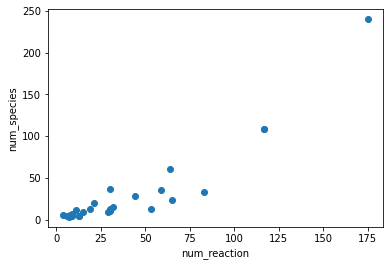

In [72]:
# Plot the reactions and species
plt.scatter(REPORT_DF[C_NUM_REACTION], REPORT_DF[C_NUM_SPECIES])
plt.xlabel(C_NUM_REACTION)
plt.ylabel(C_NUM_SPECIES)

**Questions**
1. What other statistics are useful in guaging the complexity of resolving model errors

# Model 851

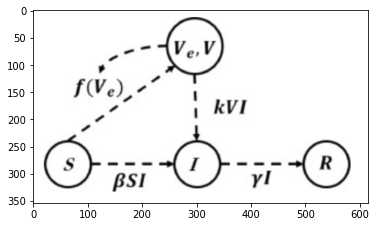

In [87]:
import matplotlib.image as mpimg
pngPath = os.path.join(MODEL_DIR, "model851.png")
image = mpimg.imread(pngPath)
plt.imshow(image)
plt.show()

In [79]:
modelStr, _ = getModel(851)
print(modelStr)

// Created by libAntimony v2.12.0
function Function_for_Susceptible_Individual_Transmission(beta, I, S)
  beta*I*S;
end

Function_for_Susceptible_Individual_Transmission is "Function_for_Susceptible_Individual_Transmission"

function Function_for_Vaccinated_Population_Growth(r, V_e, A)
  r*(1 - V_e/A);
end

Function_for_Vaccinated_Population_Growth is "Function_for_Vaccinated_Population_Growth"

function Function_for_Vaccinated_Population_Infection(k, I, V)
  k*I*V;
end

Function_for_Vaccinated_Population_Infection is "Function_for_Vaccinated_Population_Infection"


model *Ho2019___Mathematical_models_of_transmission_dynamics_and_vaccine_strategies_in_Hong_Kong_during_the_2017_2018_winter_influenza_season__Simple()

  // Compartments and Species:
  compartment compartment_;
  species S in compartment_, V in compartment_, V_e in compartment_, I in compartment_;
  species R in compartment_;

  // Assignment Rules:
  k := ModelValue_3*(1 - ModelValue_5);
  fraction_S := S/fraction_total;


In [83]:
checkMassBalance(851)

Model analyzed...
At least one error found.


V = I by reaction(s):
1. Vaccinated_Population_Infection: V -> I

I = S by reaction(s):
2. Susceptible_Individual_Transmission: S -> I

However, V < S by reaction(s):
3. Vaccinated_Population_Growth: S -> V + V_e


----------------------------------------------------------------------



**********************************************************************




**Questions**
1. Does the mass balance check apply to this model?
1. What is the role of ``V_e``?
1. Is there another conservation law that can be applied to detect static errors in this kind of model?

# Model 847

In [89]:
modelStr, _ = getModel(847)
print(modelStr)

// Created by libAntimony v2.12.0
function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Function_for_Caffeoyl_Shikimate_Biosynthesis(a_3, X_2, X_3, K_3_2, K_3_3)
  a_3*X_2*X_3/((K_3_2 + X_2)*(K_3_3 + X_3));
end

Function_for_Caffeoyl_Shikimate_Biosynthesis is "Function_for_Caffeoyl_Shikimate_Biosynthesis"

function Function_for_Phenylalanine_Biosynthesis_Shikimate(a_1, X_1, K_1, b, X_2)
  a_1*X_1/(K_1*(1 + b*X_2) + X_1);
end

Function_for_Phenylalanine_Biosynthesis_Shikimate is "Function_for_Phenylalanine_Biosynthesis_Shikimate"

function Function_for_V_2_Shikimate_Transport(a2f, X_1, K2f, b2f, X_3, a2r, K2r, b2r)
  a2f*X_1/(K2f*(1 + b2f*X_3) + X_1) - a2r*X_3/(K2r*(1 + b2r*X_1) + X_3);
end

Function_for_V_2_Shikimate_Transport is "Function_

In [91]:
checkMassBalance(847)

Model analyzed...
At least one error found.


X_2 = X_1 by reaction(s):
1. V_1_Phenylalanine_Biosynthesis_Shikimate: X_1 -> X_2

X_1 = X_3 by reaction(s):
2. V_2_Shikimate_Transport: X_1 -> X_3

X_3 = X_4 by reaction(s):
3. V_4_Mass_Release_Monolignol_Pathway: X_4 -> X_3

However, X_2 < X_4 by reaction(s):
4. V_3_Caffeoyl_Shikimate_Biosynthesis: X_2 + X_3 -> X_4


----------------------------------------------------------------------


X_3 = X_4 by reaction(s):
1. V_4_Mass_Release_Monolignol_Pathway: X_4 -> X_3

However, X_3 < X_4 by reaction(s):
2. V_3_Caffeoyl_Shikimate_Biosynthesis: X_2 + X_3 -> X_4


----------------------------------------------------------------------



**********************************************************************


